In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import single_graph_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [3]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 20
NODE_HIDDEN_SIZE = 50
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [4]:
a = ASODataset(single_graph_batch, learning_from="ddG")
train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\Haoyu Fan\Desktop\GNN\GNN_enantioselectivity\runs\..\ASOhelpers.py:133: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


In [8]:
device = torch.device('cuda')
model = GNNModel_sg_edge_attr_ddG(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, BOND_ATTR, num_layers=3, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.5370, Test Loss: 0.5683, Train MAE: 0.5705, Test MAE: 0.5819, , Train R2: -0.1184, Test R2: -0.0523
Epoch: 002, Train Loss: 0.4629, Test Loss: 0.5168, Train MAE: 0.5396, Test MAE: 0.5733, , Train R2: 0.0359, Test R2: 0.0431
Epoch: 003, Train Loss: 0.4520, Test Loss: 0.5100, Train MAE: 0.5311, Test MAE: 0.5682, , Train R2: 0.0586, Test R2: 0.0556
Epoch: 004, Train Loss: 0.4272, Test Loss: 0.4792, Train MAE: 0.5174, Test MAE: 0.5533, , Train R2: 0.1104, Test R2: 0.1126
Epoch: 005, Train Loss: 0.4656, Test Loss: 0.4963, Train MAE: 0.5371, Test MAE: 0.5528, , Train R2: 0.0303, Test R2: 0.0810
Epoch: 006, Train Loss: 0.4421, Test Loss: 0.4628, Train MAE: 0.5187, Test MAE: 0.5258, , Train R2: 0.0793, Test R2: 0.1431
Epoch: 007, Train Loss: 0.4373, Test Loss: 0.4914, Train MAE: 0.5312, Test MAE: 0.5745, , Train R2: 0.0894, Test R2: 0.0900
Epoch: 008, Train Loss: 0.3261, Test Loss: 0.3495, Train MAE: 0.4493, Test MAE: 0.4760, , Train R2: 0.3210, Test R2: 0.3528
Epoch:

array([0.07232855, 0.19460368, 0.8493707 , 0.08801619, 0.21683997,
       0.83702421])

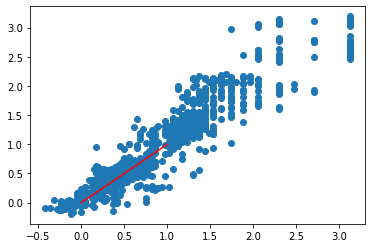

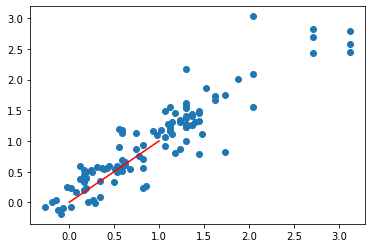

In [9]:
t = Trainer(model, device, optimizer, scheduler, glob_v= False)
t.train(train_loader, val_loader, nn.MSELoss, EPOCHS)